<h1 style="background-color:black
;font-family:newtimeroman;font-size:275%;text-align:center;border-radius: 100px 100px; color:#03e8fc">  Walmart Store Sales Forecasting </h1><a id=0></a>

                                                                   
<h1 style=font-size:150%;text-align:left;color:#0000FF> In this Notebook, I have included the following </h1><a id=0></a>
                                                                   
<h1 style=font-size:140%;text-align:left;color:#0000FF> 1.  Data Preparation </h1><a id=0></a>

<h1 style=font-size:130%;text-align:left;color:#0000CD >  
                                                                                                                
- Merging of Data                                                         
- Extracting Date Information                                                        
- Columns Information                                                        
- Missing Values  

<h1 style=font-size:140%;text-align:left;color:#0000FF> 2.  Exploratory Data Analysis </h1><a id=0></a>

<h1 style=font-size:130%;text-align:left;color:#0000FF>                                                          
                                                        
- Poularity of Store Types
- Average Sales - Store Type
- Average Monthly Sales - Per Year
- Average Weekly Sales - Per Year
- Average Store Sales
- Holidays Vs Nonholidays Sales
- Relationship: Week of Year vs Sales 
- Relationship: Size of Store vs Sales
- Relationship: Temperature vs Sales 
- Relationship: Fuel Price vs Sales
- Relationship: CPI vs Sales 
- Relationship: Unemployment vs Sales 
- Coorelation Matrix 



<h1 style=font-size:140%;text-align:left;color:#0000FF> 3.  Data Preparation for Model Training </h1><a id=0></a>


<h1 style=font-size:140%;text-align:left;color:#0000FF> 4.  Machine Learning </h1><a id=0></a>

<h1 style=font-size:130%;text-align:left;color:#0000FF>                                                          
                                                        
- Linear Regression
- Ridge Regression
- Decision Tree
- Random Forest
- Tuning of Random Forest Hyperparameters
- Gradient Boosting Machine
- Tuning of Gradient Boosting Machine Hyperparameters
- Models Comparison
- Making Predictions
- Submission 



<h1 style=font-size:140%;text-align:left;color:#0000FF> 5.  Inferences and Conclusions </h1><a id=0></a>
                                                                                                                

In [1]:
!pip install jovian opendatasets --upgrade --quiet

!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --quite
     |████████████████████████████████| 21.8 MB 1.8 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.1.0
    Uninstalling plotly-5.1.0:
      Successfully uninstalled plotly-5.1.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os
from zipfile import ZipFile

import plotly.express as px

%matplotlib inline

In [3]:
od.download('https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

 yasirhussain1987


Your Kaggle Key: 

 ································


100%|██████████| 2.70M/2.70M [00:00<00:00, 172MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [4]:
with ZipFile('./walmart-recruiting-store-sales-forecasting/train.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting')
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/test.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/features.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip') as f:
    f.extractall(path='walmart-recruiting-store-sales-forecasting') 

In [ ]:
os.listdir('walmart-recruiting-store-sales-forecasting')

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc">  1. Data Preparation </h1><a id=0></a>

The dataset contain the three files in the csv format:

train.csv : this file has 421570 rows and 5 columns. The columns contain the information for a store, department, date, weekly sales and whether a particular week is a holiday week or not

store.csv : this file has 45 rows and 3 columns. The columns correpond to the stores, their type and sizes of stores

features.csv: this file 8190 rows and 12 columns. This file again has some further information regarding the stores and the region in which a particular store is located. It has date, temperature, fuel price, consumer price index, unemployment rate information for the region in which a particular store is located. It also has 5 columns MarkDown1-5 which corresponds to some promotional activities going on in different stores. 

In [5]:
walmart = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train.csv')
stores = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')
features = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features.csv')
testing = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test.csv')

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc">  Merging of Data </h1><a id=0></a>

Let's merge the data from 3 dataframes into a single dataframe and proceed further with a one dataframe

In [6]:
merged = walmart.merge(stores, how='left').merge(features, how='left')
testing_merged = testing.merge(stores, how='left').merge(features, how='left')

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc">  Extracting Date Information </h1><a id=0></a>

The sales are given for Years 2012-2012 on weekly basis. So let's split the date column to extract information for year, month and week

In [7]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    
split_date(merged) 
split_date(testing_merged)   

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc">  Columns Information: Data Types </h1><a id=0></a>

In [8]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

Most of the columns in the data are numeric columns except the IsHoliday which is of boolean type and Type represents an object

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc">  Missing Values </h1><a id=0></a>

In [9]:
missing_values = merged.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

Except the Markdown 1-5 columns, all other columns are complete. Markdown1-5 contain lots of missing values, more than 250000 in each markdown column. These columns correspond to the promotional activities being carried out at different stores. The promotional markdowns only started after November 2011 and is not running all the times at all the stores. So this makes sense why these columns have lot of NaN values. Let's perform the exploratory data analysis and study their relationship with the weekly sales and then we will decide about these columns and the missing values

<h1 style="background-color:black
;font-family:newtimeroman;font-size:300%;text-align:left; color:#03e8fc">  2. Exploratory Data Analysis </h1><a id=0></a>

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc">  Popularity of Store Types </h1><a id=0></a>

In [11]:
typecounts = merged.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Popularity of Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

***Insights:***

Type A stores are more popular than the B and C types

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Average Sales - Store Type </h1><a id=0></a>

In [12]:
avgweeklysales = merged.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df, 
             x="Store_Type", 
             y="AvgSales",  
             title="Avergae Sales - Per Store",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

***Insights:***

In terms of sales, type A stores are superior than the other two types

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Average Monthly Sales - Per Year </h1><a id=0></a>

In [13]:
sales2010 = merged[(merged.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2010 = pd.DataFrame(list(sales2010.items()), columns=['Month', 'AvgSales2010'])

sales2011 = merged[merged.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2011 = pd.DataFrame(list(sales2011.items()), columns=['Month', 'AvgSales2011'])

sales2012 = merged[merged.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2012 = pd.DataFrame(list(sales2012.items()), columns=['Month', 'AvgSales2012'])

monthly_merged = df2010.merge(df2011, how='right', on='Month').merge(df2012, how='left', on='Month')

import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2010.Month,
                y = df2010.AvgSales2010,
                name = "AvgSales2010")
# create trace2 
trace2 = go.Bar(
                x = df2011.Month,
                y = df2011.AvgSales2011,
                name = "AvgSales2011")

# create trace3 
trace3 = go.Bar(
                x = df2012.Month,
                y = df2012.AvgSales2012,
                name = "AvgSales2012")
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group",
                   template='plotly_dark',
                   xaxis_title="Month",
                   yaxis_title="Average Monthly Sales")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes( dtick=1)
fig.show()

***Insights:***

1. Month of January witnessed the lowest sales for 2011 and 2012 while for 2010 the weekly sales are not given in the data


2. From Feburary till October the weekly sales nearly remains constant around 15000 for the 3 years


3. November and December showed the highest sales for 2010 and 2011 while for 2012 the sales data has not been provided

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Average Weekly Sales - per Year </h1><a id=0></a>

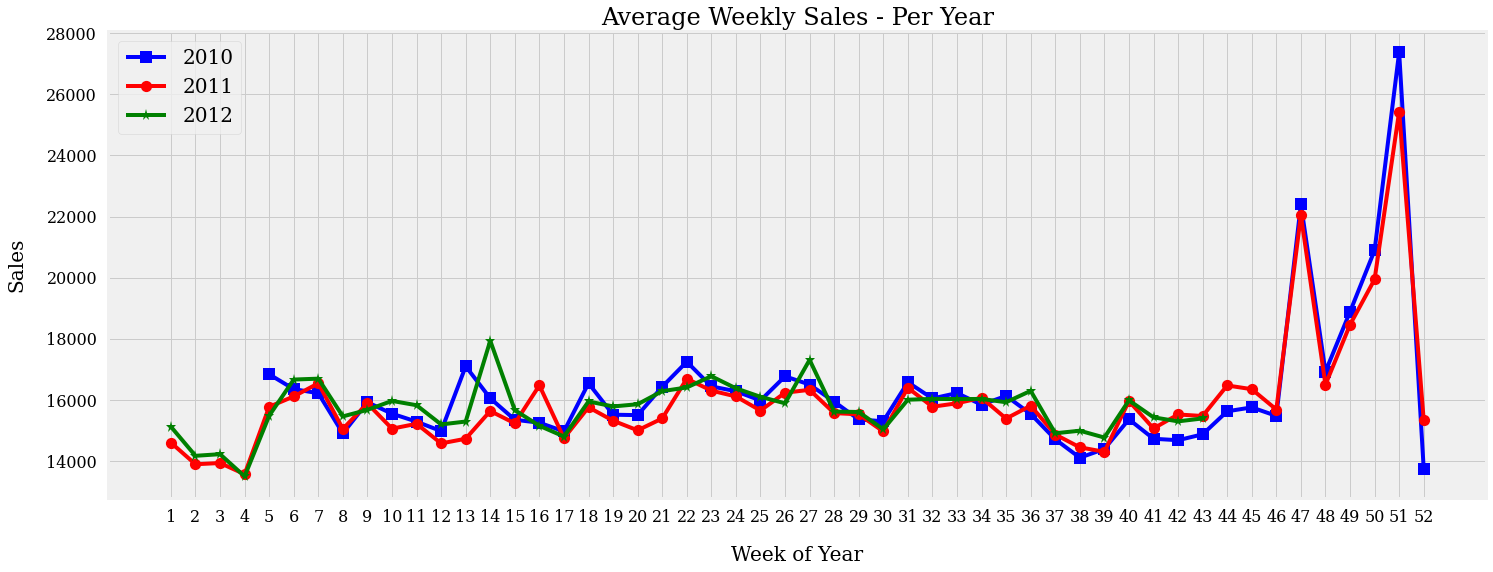

In [14]:
weekly_sales_2010 = merged[merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged[merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged[merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

***Insights:***

1. On weekly basis the week of Thanksgiving holiday and one week before Christmas witnessed the highest sales for the years 2010 and 2011


2. In 2012 the week no. 14 recorded the highest sales as compared to other weeks of the year but that doesn't correponds to any holiday or any special event

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Average Store Sales </h1><a id=0></a>

In [15]:

store_sales = merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(store_sales, 
             x=store_sales.index, 
             y=store_sales.values,  
             title="Average Sales - Per Store",
             labels={'x':'Stores', 'y':'Sales'},
             color_discrete_sequence=["#DC143C"], template='plotly_dark')

fig.update_xaxes(tick0=1, dtick=1)

fig.show()

***Insights:***

1. The sales vary by large amount among the 45 stores


2. It really depends which category of store it is and which week of the particular year is under consideration

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Average Store Sales - Year Wise </h1><a id=0></a>

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

store_sales_2010 = merged[merged.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = merged[merged.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 = merged[merged.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales 2010", "Average Store Sales 2011", "Average Store Sales 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="AvgSales", row=1, col=1)
fig.update_yaxes(title_text="AvgSales", row=2, col=1)
fig.update_yaxes(title_text="AvgSales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

***Insights:***

1. The overall trend of store sales over the 3 years remain the same as it depends on the type of store and its size

2. The stores 2,4,13,14 and 20 showed the highest sales in all the 3 years

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Average Department Sales </h1><a id=0></a>

In [17]:
dept_sales = merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(dept_sales, 
             x=dept_sales.values, 
             y=dept_sales.index,
             template = 'plotly_dark',  
             title="Average Sales - Per Department",
             labels={'x':'Dept', 'y':'Sales'},
             color_discrete_sequence=["#DC143C"], orientation='h', height=1200, width=1000)

fig.update_yaxes(tick0=1, dtick=1)

fig.show()

***Insights:***

1. Different departments showed different levels of average sales 

2. Notables are 38,65,72,92 and 95 which have highest average sales

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Average Department Sales - Per Year </h1><a id=0></a>

Let's check the department sales on yearly basis to see if there are some departments which have different levels of sales in 3 different years

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

dept_sales_2010 = merged[merged.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = merged[merged.Year==2011].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = merged[merged.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Average Dept Sales 2010", "Average Dept Sales 2011", "Average Dept Sales 2012"))

fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template = 'plotly_dark', showlegend=False, height=1000)

fig.update_xaxes(title_text="AvgSales", row=1, col=1)
fig.update_xaxes(title_text="AvgSales", row=1, col=2)
fig.update_xaxes(title_text="AvgSales", row=1, col=3)

fig.update_yaxes(title_text="Dept", row=1, col=1)
fig.update_yaxes(title_text="Dept", row=1, col=2)
fig.update_yaxes(title_text="Dept", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

***Insights:***

 The sales trend on yearly basis remain the same. Stores with higher sales appeared in all the 3 years while with lowe sales showed the same trend in all the 3 years



<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Holidays Vs Nonholidays Sales </h1><a id=0></a>

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

holiday_sales = merged.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = merged.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False)
fig.show()

***Insights:***

1. Only 7 percent of the weeks in the data are the holiday weeks


2. Despite being the less peecentage of holiday weeks the sales in the holidays week are on the average higher than in the non-holiday weeks

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Relationship: Week of Year vs Sales </h1><a id=0></a>

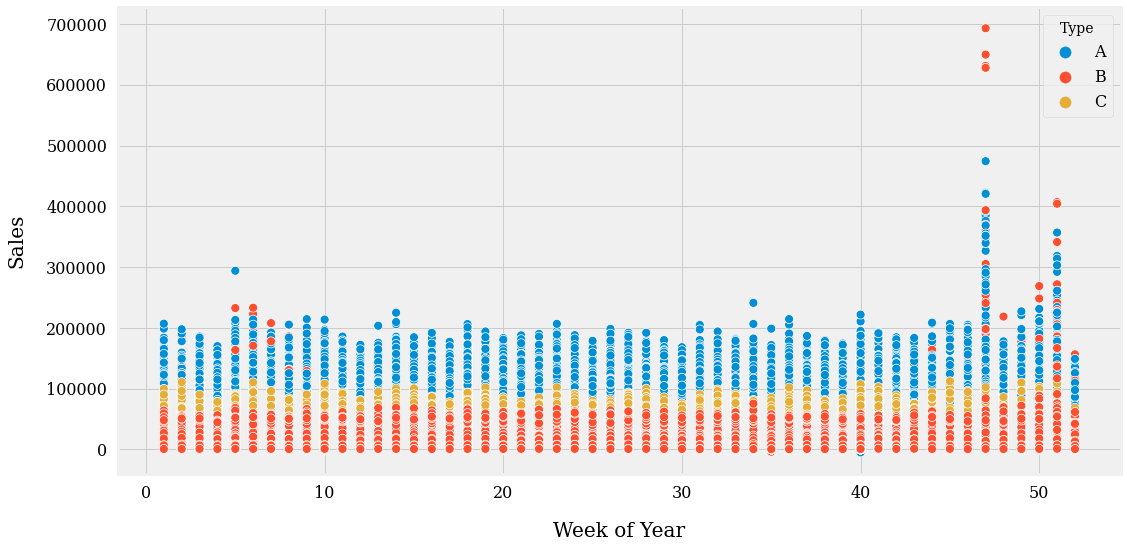

In [20]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.WeekOfYear, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

***Insights:***

This shows only a slight relationship as the weekly sales increased towards the end of the year

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Relationship: Size of Store vs Sales </h1><a id=0></a>

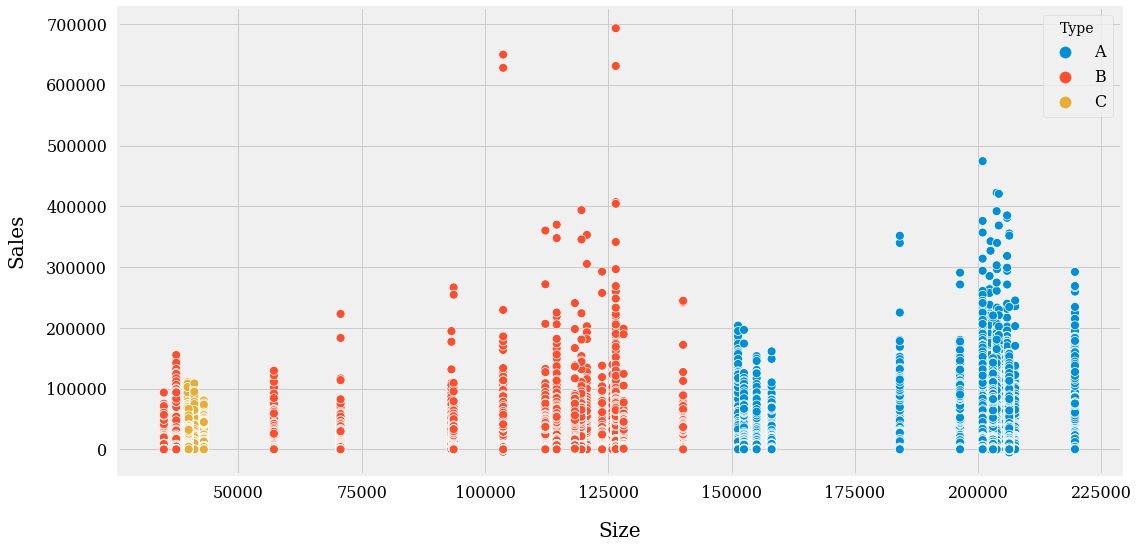

In [21]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Size, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

***Insights:***

The size of the store shows a linear relationship with the weekly sales. The sales generally increases with increase of size of store with some exceptions

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Relationship: Temperature vs Sales </h1><a id=0></a>

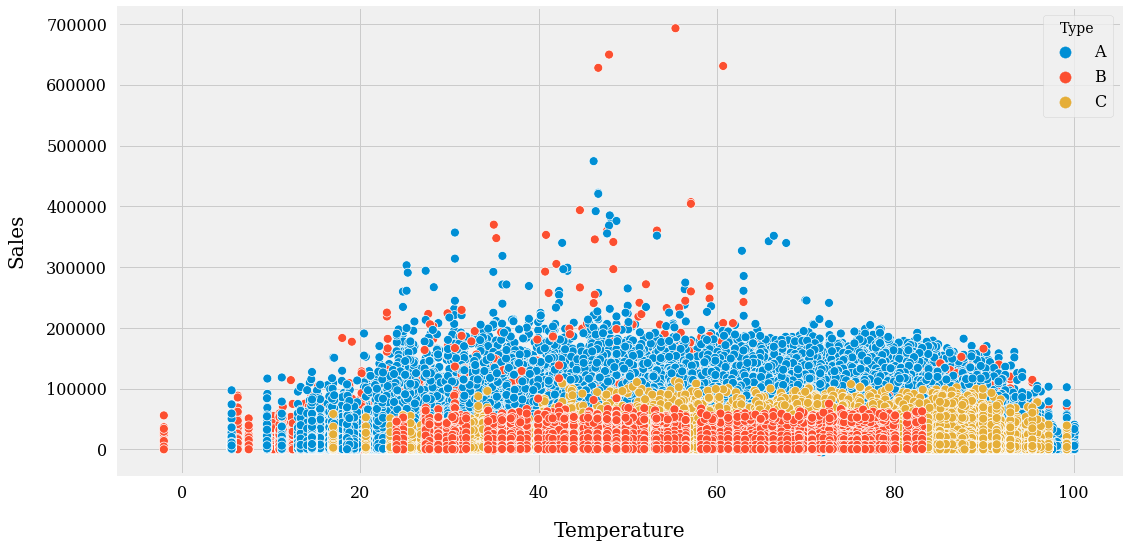

In [22]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Temperature, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

***Insights:***

There seems to be no relatiobship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Relationship: Fuel Price vs Sales </h1><a id=0></a>

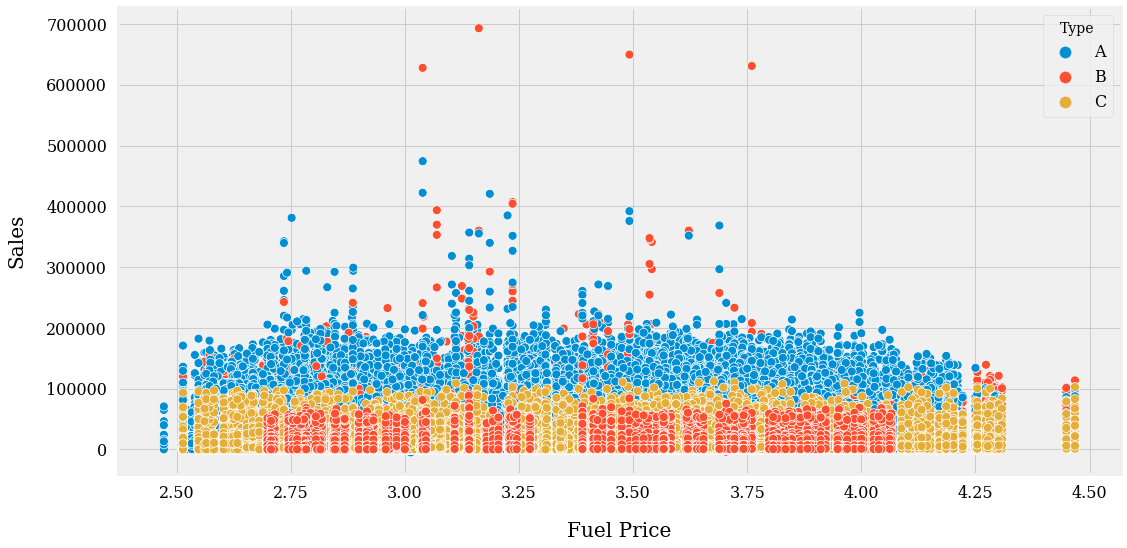

In [23]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Fuel_Price, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

***Insights:***

Between fuel price and the sales there doesn't seem to exist any clear relationship

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Relationship: CPI vs Sales </h1><a id=0></a>

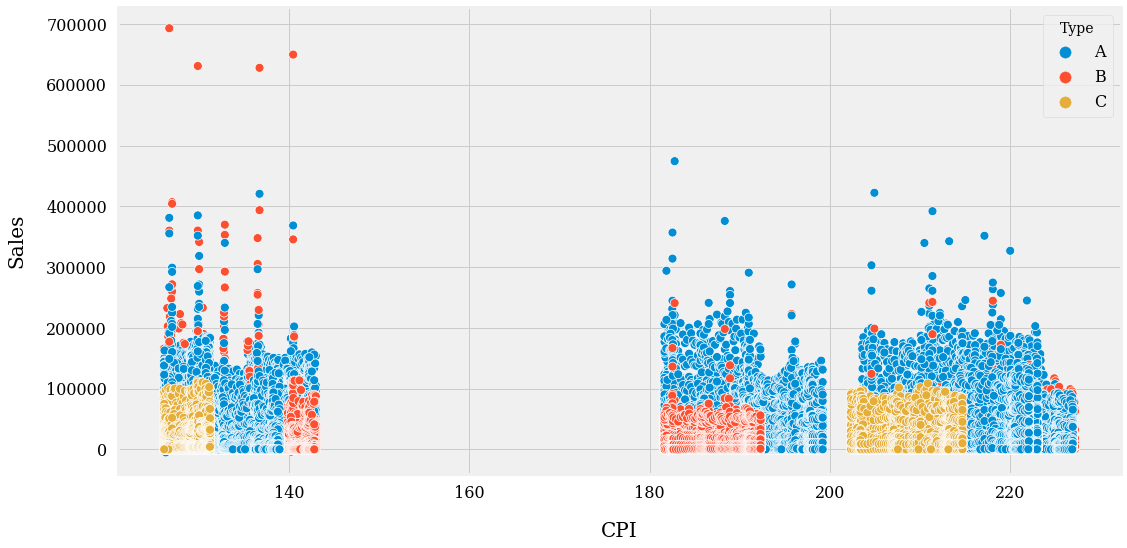

In [24]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.CPI, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

***Insights:***

There are 3 clear clusters but there doesn't exist any clear correlation between CPI and weekly sales

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Relationship: Unemployment vs Sales </h1><a id=0></a>

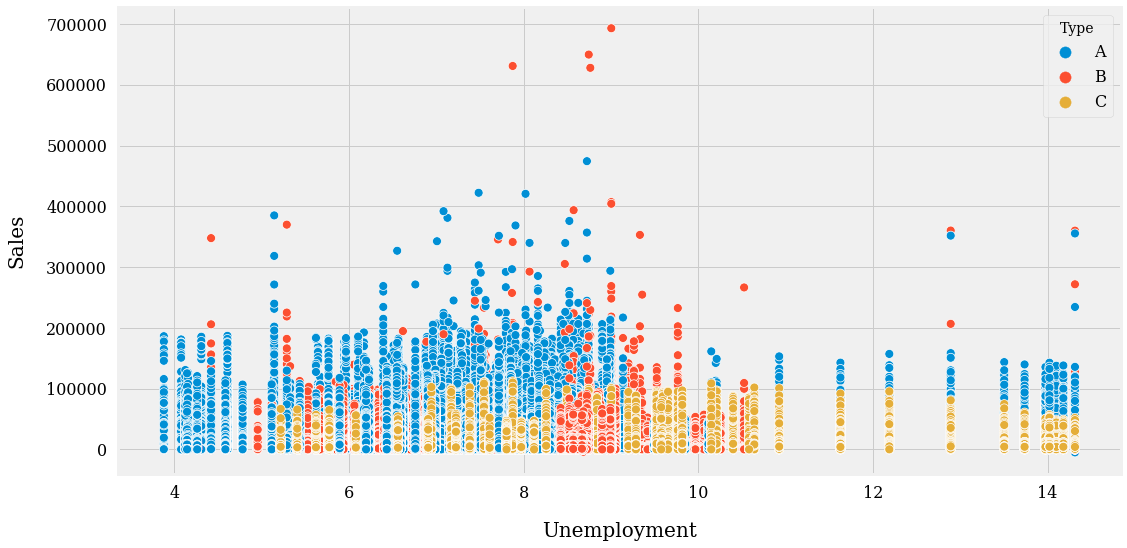

In [25]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=merged.Unemployment, y=merged.Weekly_Sales, hue=merged.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

***Insights:***

Also the Unemployment rate doesn't seem to have any effect on the weekly sales

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Coorelation Matrix </h1><a id=0></a>

Lets study the relationship between the different columns numerically to check how they correlate with the weekly sales in order to confirm the inferences we have gathered from the above EDA study. Since the correlation value can only be calculated for the numerical columns, so we will first convert the 'Type' column to numerical values. Type 'A', 'B' and 'C' will be mapped to 1, 2 and 3 respectively

In [26]:
storetype_values = {'A':3, 'B':2, 'C':1}
merged['Type_Numeric'] = merged.Type.map(storetype_values)
testing_merged['Type_Numeric'] = testing_merged.Type.map(storetype_values)

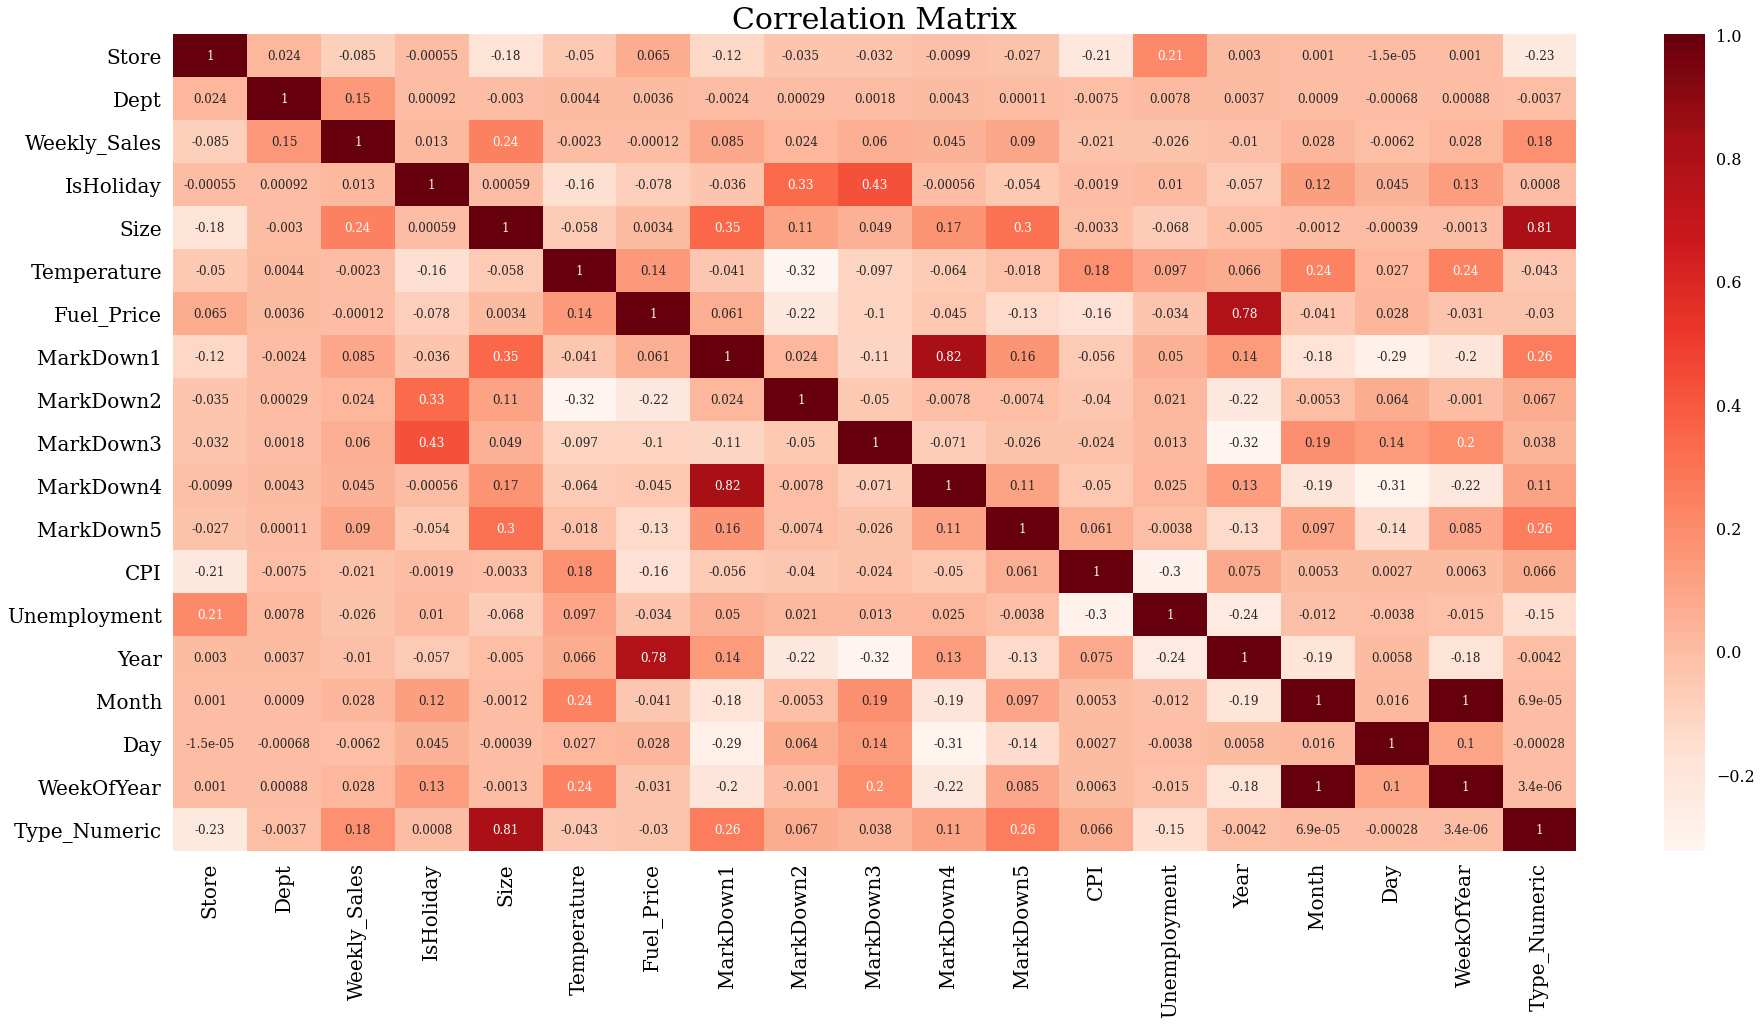

In [27]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(merged.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

***Insights:***

- Department, Store size and Type have moderate correlation with the weekly sales


- Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out 


- Temperature. Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out 


- IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks


- We will also leave out Month and Day as this information is already contained in the WeekOfYear



<h1 style="background-color:black
;font-family:newtimeroman;font-size:300%;text-align:left; color:#03e8fc"> 3.  Data Preparation for Model Training </h1><a id=0></a>

Following steps will be performed for preparing the data for the subsequent model training

- Based on the Exploratory Data Analysis and Coorelation study, the columns with weak relationship with the target column will be dropped 

 
 - Input and Target dataframes will be created 


 - Inputs will be scaled in the 0 to 1 range


 - Training and Validation datasets will be created


 - A function will be defined based on which the models performance will be measured

In [28]:
merged = merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

testing_merged = testing_merged.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

In [29]:
# Identify input and target columns

input_cols = merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = merged[input_cols].copy()
targets = merged[target_col].copy()

In [30]:
# Scale the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(merged[input_cols])

inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
testing_merged[input_cols] = scaler.transform(testing_merged[input_cols])


In [31]:
# Create training and validation sets

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df, targets, test_size=0.3, random_state=42)

The competition is evaluated on the weighted mean absolute error(WMAE), so we will define a function which calculates this error for the evaluation of different machine learning models

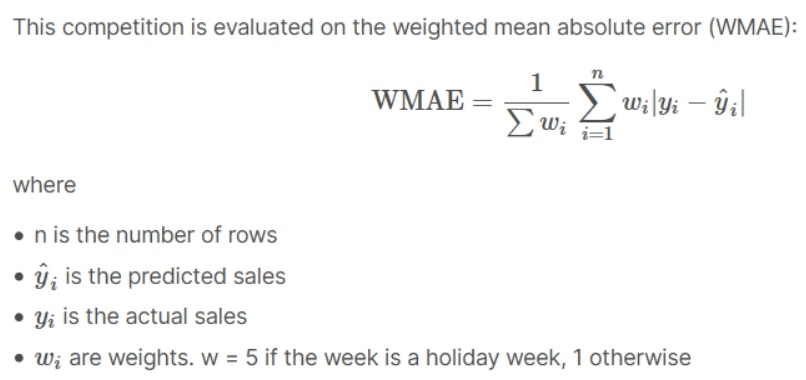

In [32]:
# Define the function to evaluate the models

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)



<h1 style="background-color:black
;font-family:newtimeroman;font-size:300%;text-align:left; color:#03e8fc">  4. Machine Learning </h1><a id=0></a>

Following ML models will be tested in this study:

- ***Linear Regression***


- ***Ridge Regression***


- ***Decision Tree***


- ***Random Forest***


- ***Gradient Boosting Machine***

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Linear Regression </h1><a id=0></a>

In [33]:
!pip install scikit-learn --quiet

In [34]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model.predict(train_inputs)

# Compute WMAE on traing data
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('The WMAE loss for the validation set is  {}.'.format(val_wmae))


The WMAE loss for the training set is  14776.36.
The WMAE loss for the validation set is  14884.37.


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Ridge Regression </h1><a id=0></a>

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model_ridge = Ridge().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model_ridge.predict(train_inputs)

# Compute WMAE on traing data
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('The WMAE loss for the training set is  {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('The WMAE loss for the validation set is  {}.'.format(val_wmae))


The WMAE loss for the training set is  14776.33.
The WMAE loss for the validation set is  14884.37.


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Decision Tree </h1><a id=0></a>

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Compute WMAE on traing data
tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('The WMAE loss for the training set is  {}.'.format(tree_train_wmae))


# Compute WMAE on validation data
tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(tree_val_wmae))

The WMAE loss for the training set is  0.0.
The WMAE loss for the validation set is  1933.55.


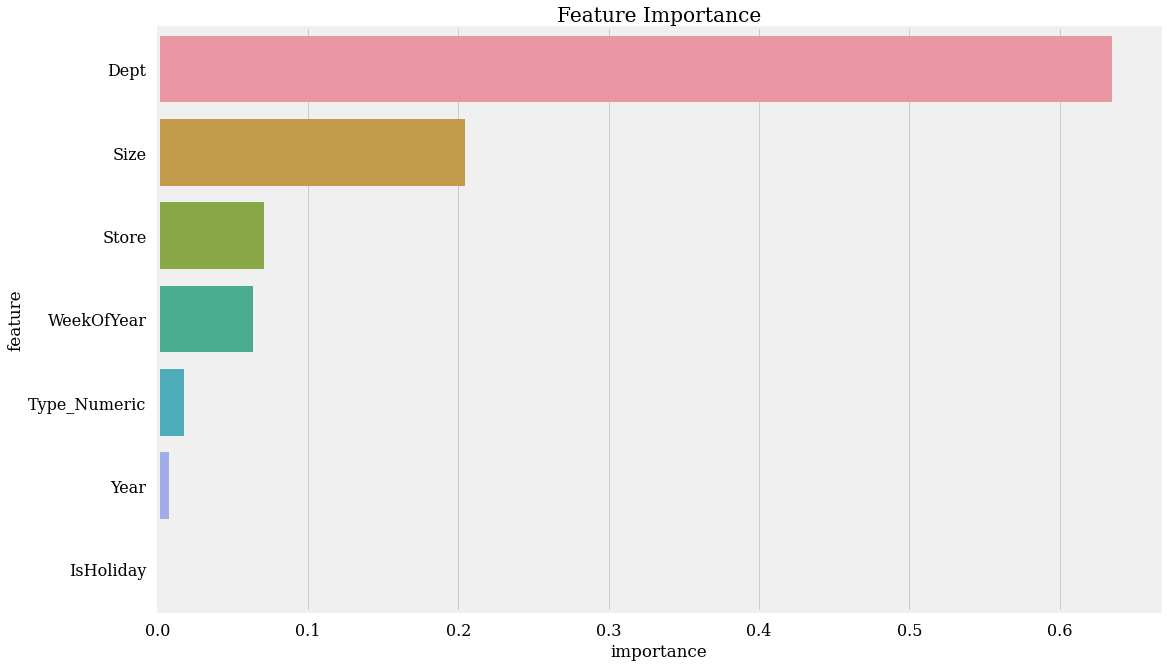

In [37]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

***Insights:***

Department, Store Size and Store Number have high model importances than the other parameters


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Random Forest </h1><a id=0></a>

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  572.12.
The WMAE loss for the validation set is  1591.81.


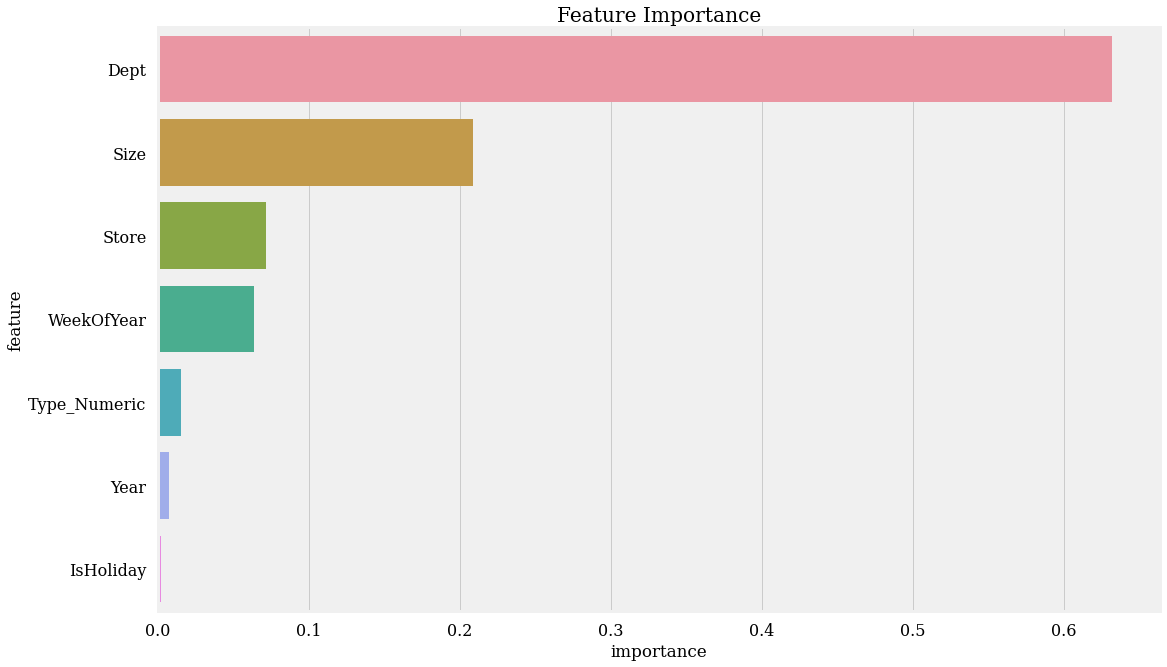

In [39]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

***Insights:***

For the Random Forest also, the Department, Store Size and Store Number have higher model importances than the other parameters

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Tuning of Random Forest Parameters </h1><a id=0></a>

Let's define two functions which assist the tuning of hyper parameters. 

'test_params' takes the parameters of Random Forest and train the model. After that it make predictions of the training and validation and return weighted mean averaged error for the traing and validation data. 

'test_param_and_plot' takes the parameter name and the range of values to be tested. For these values 'test_params' is called inside the funtion to train and evaluate the model. Finally the training and validation errors are plotted against the tested values.

In [40]:
def test_params(**params):  
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [41]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

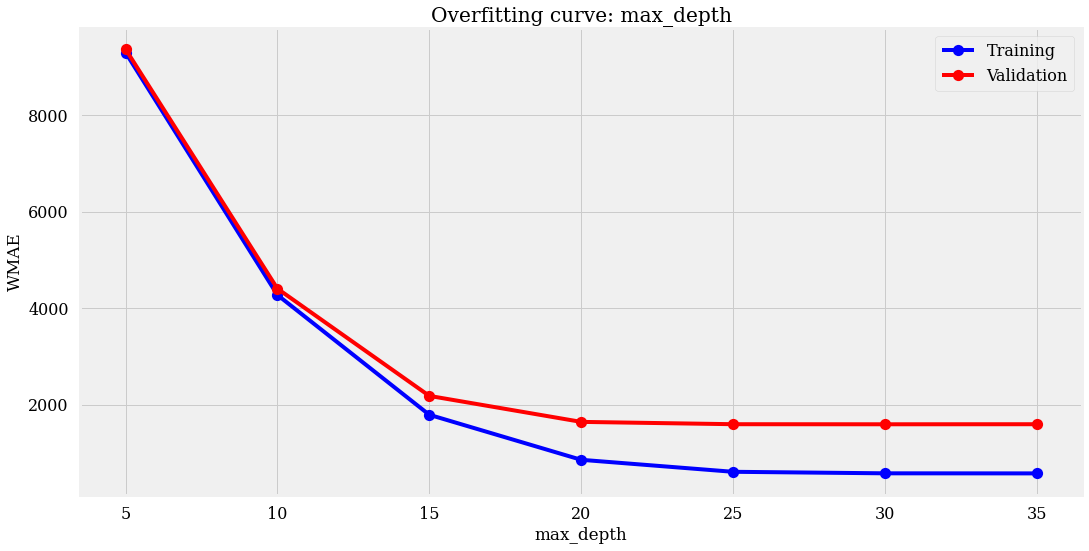

In [42]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

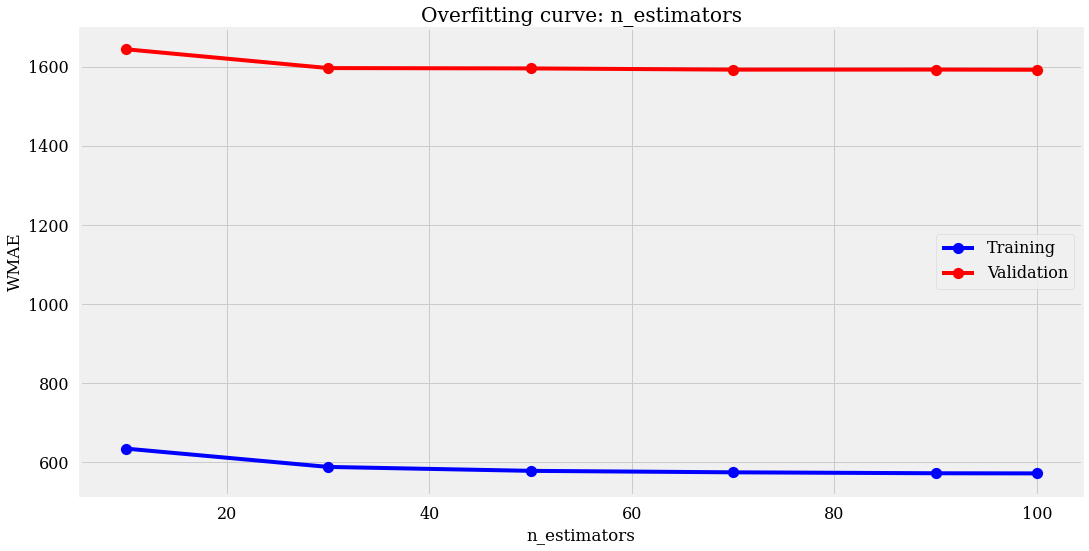

In [43]:
test_param_and_plot('n_estimators', [10, 30, 50, 70, 90, 100])

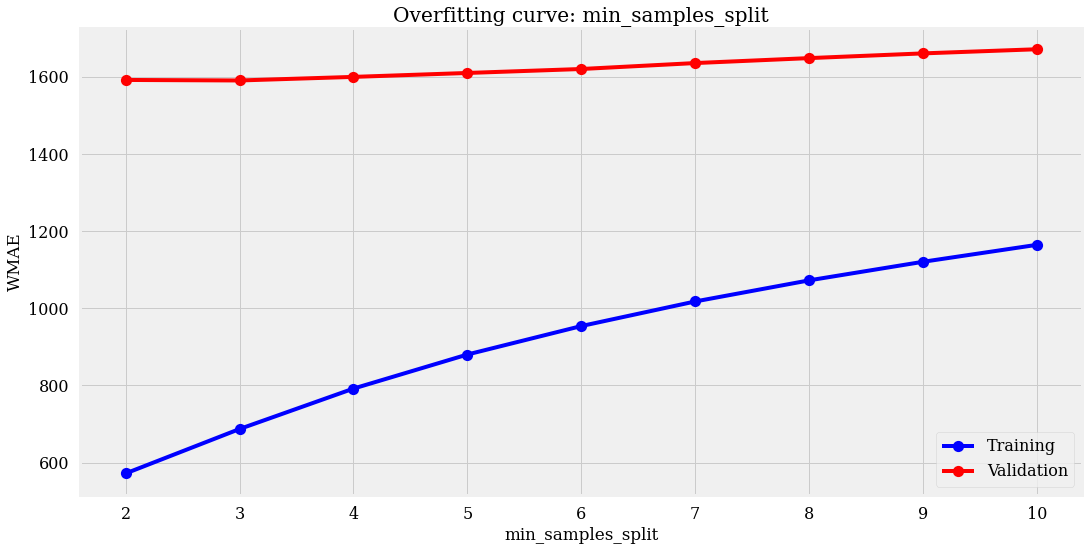

In [44]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])

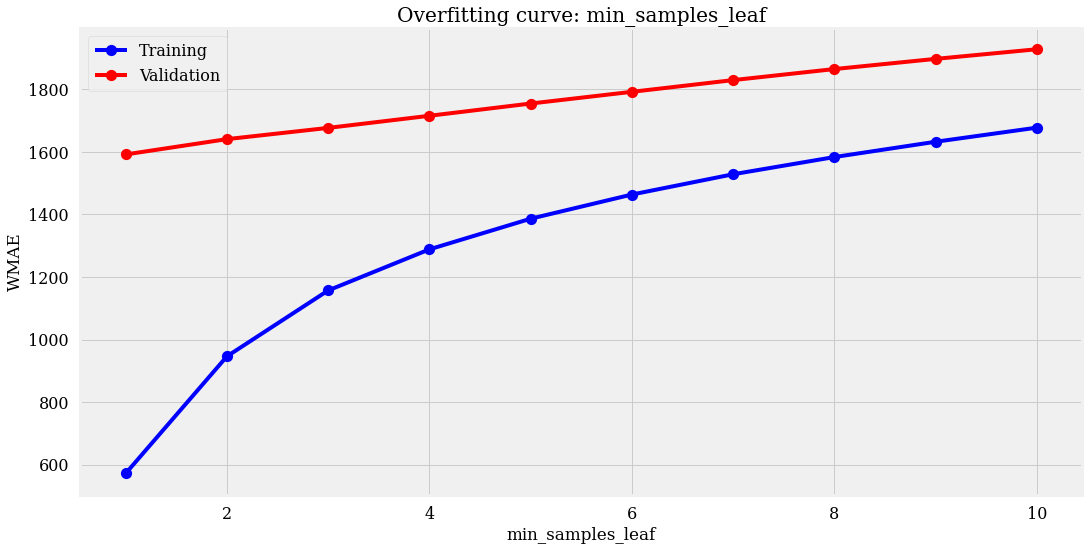

In [45]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

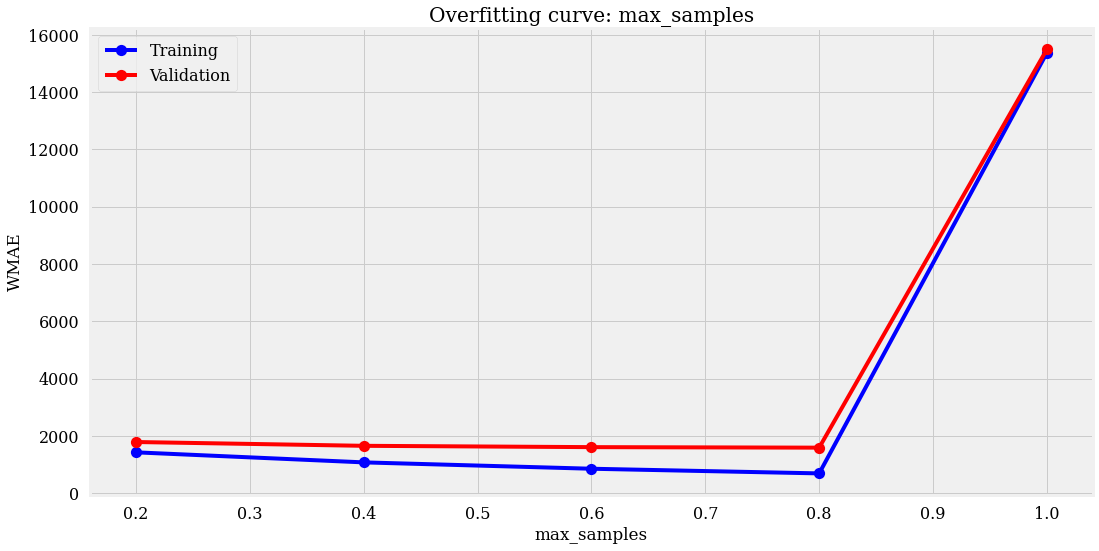

In [46]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

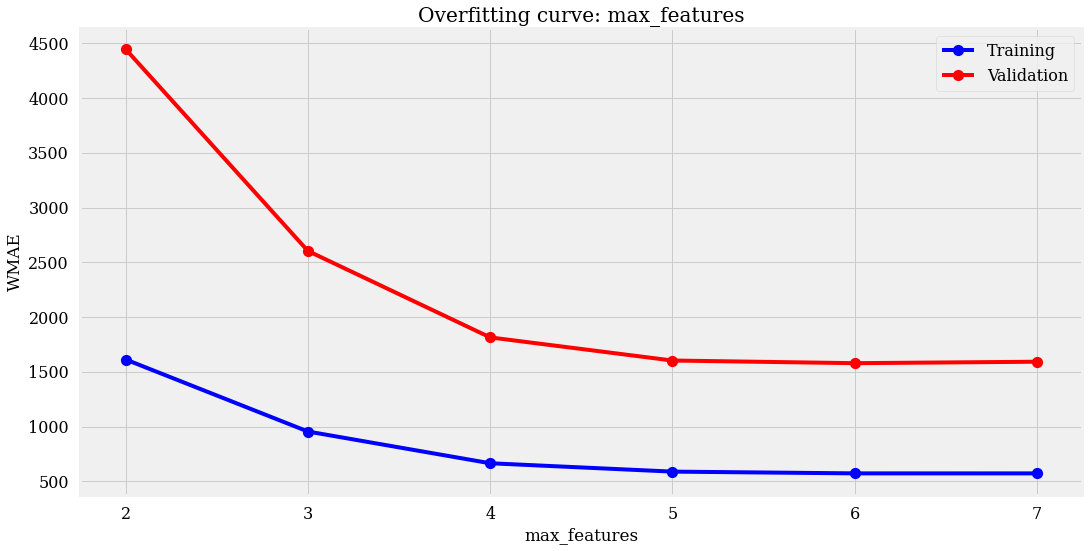

In [47]:
test_param_and_plot('max_features', [2, 3, 4, 5, 6, 7])

From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

**max_depth: 30**

**n_estimators: 100**

**min_samples_split: 2**

**min_samples_leaf: 1**

**max_samples: 0.8**

**max_features: 7**

These parameters were tuned one at a time but they are somehow interrelated and effect eachother but from this I got a rough idea where the optimal values lie. Further after simultaneously varying the parameters by making some educated guesses, I found the following parameters which give better performance than the untuned base model

**max_depth: 30**

**n_estimators: 130**

**min_samples_split: 2**

**min_samples_leaf: 1**

**max_samples: 0.9999**

**max_features: 6**

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, max_depth=30, n_estimators=130, min_samples_split=2, min_samples_leaf=1, max_samples=0.99999, max_features=6,  random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  569.78.
The WMAE loss for the validation set is  1571.88.


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Gradient Boosting Machine </h1><a id=0></a>

In [49]:
!pip install xgboost lightgbm --upgrade --quiet

In [50]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  2979.66.
The WMAE loss for the validation set is  3090.44.


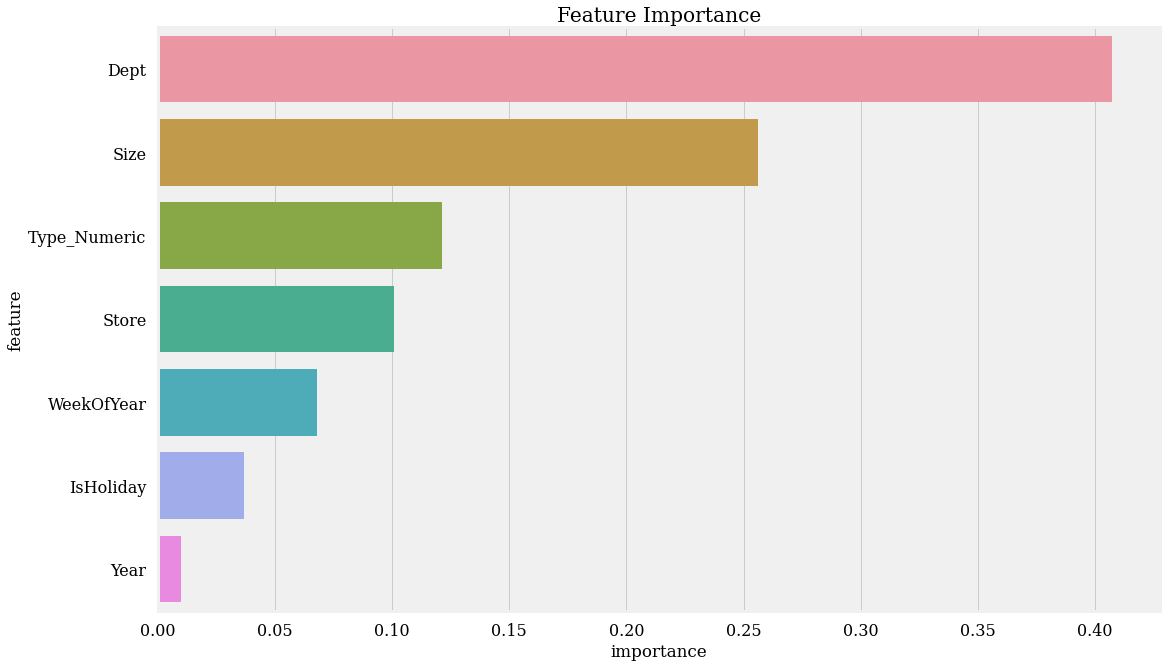

In [51]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

***Insights:***

- For the Gradient Boosting Machine, the Department, Store Size and Store Type are the major contributing features

- This differs little bit from Decision Trees and Random Forests as in this case the Store Type has higher importance than the Store Number 

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Tuning of Model Parameters </h1><a id=0></a>

Let's define two functions like before which assist the tuning of hyper parameters. 

'test_params_xgb' takes the parameters of Random Forest and train the model. After that it make predictions on the training and validation and return weighted mean averaged error for the traing and validation data. 

'test_param_and_plot_xgb' takes the parameter name and the range of values to be tested. For these values 'test_params' is called inside the funtion to train and evaluate the model. Finally the training and validation errors are plotted against the tested values.

In [52]:
def test_params_xgb(**params):  
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [53]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

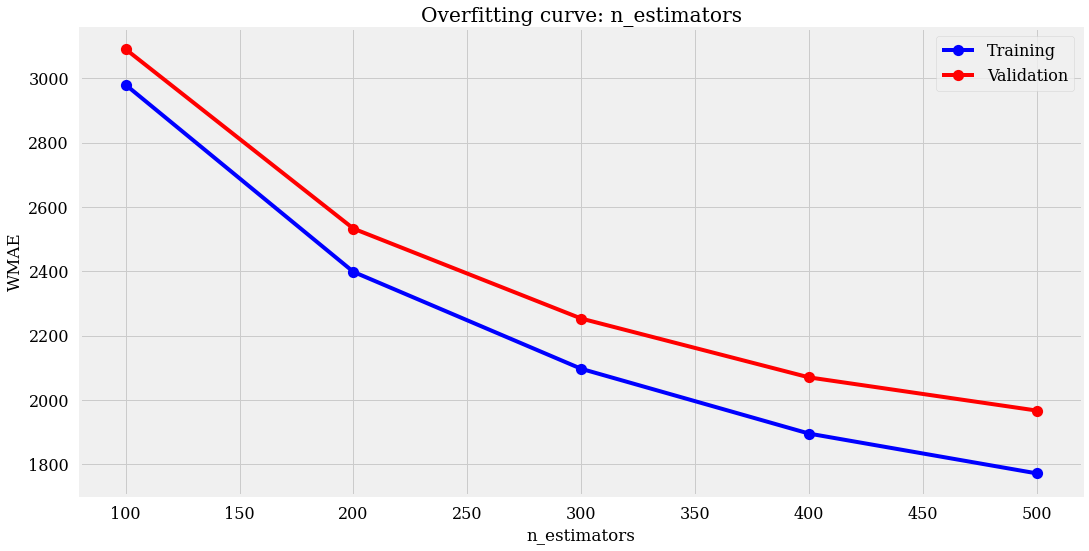

In [54]:
test_param_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500])

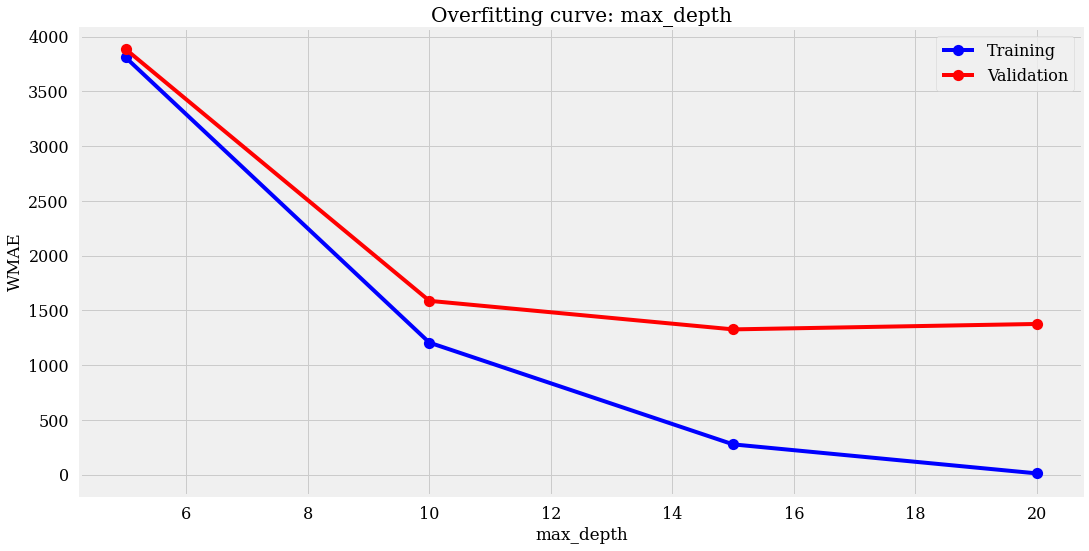

In [55]:
test_param_and_plot_xgb('max_depth', [5, 10, 15, 20])

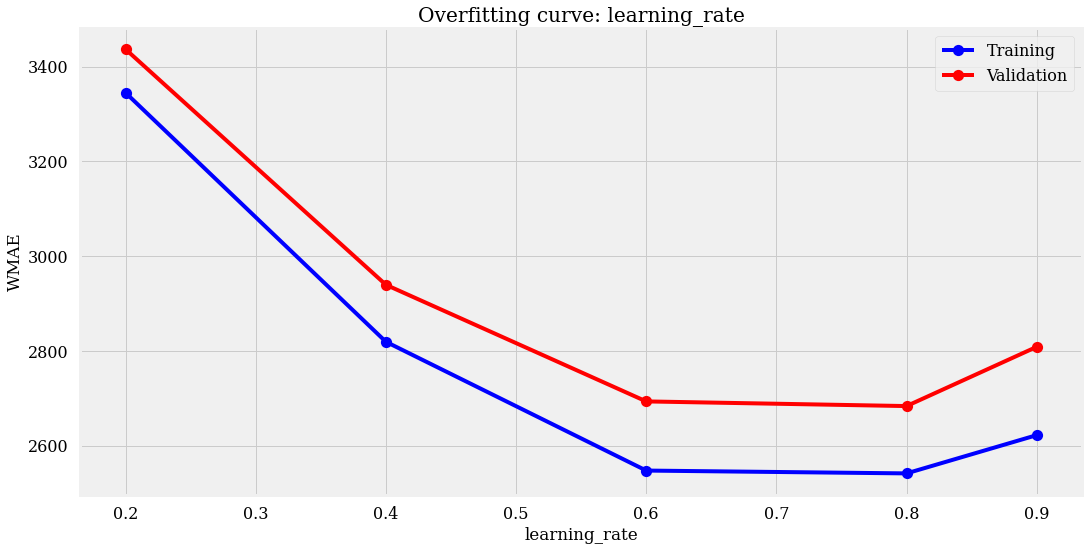

In [56]:
test_param_and_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])

From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

**max_depth: 20**

**n_estimators: 500**

**learning_rate: 0.8**



These parameters are varied one at a time but they both are inter related. These parameters are then varied simultaneouslyfurther fine tuning of the model by making some educated guesses and the best combination of values which minimizes the validation error are as follows:

**max_depth: 15**

**n_estimators: 400**

**learning_rate: 0.35**


In [57]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  16.66.
The WMAE loss for the validation set is  1339.29.


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Model's Comparison </h1><a id=0></a>

## Linear Regression


*   WMAE for Training set: 14776.36
*   WMAE for Validation set: 14884.37



## Ridge Regression

*   WMAE for Training set: 14776.33
*   WMAE for Validation set: 14884.34


## Decision Tree

*   WMAE for Training set: 0.0
*   WMAE for Validation set: 1938.54



## Random Forest

*   WMAE for Training set: 569.99
*   WMAE for Validation set: 1571.46



## Gradient Boosting Machine

*   WMAE for Training set:  16.66
*   WMAE for Validation set: 1339.29





<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#FFFF00"> The best performer among the tested models is **'Gradient Boosting Machine'** with tuned Hyperparameters </h1><a id=0></a>


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Making Predictions </h1><a id=0></a>

In [58]:
test_preds = gbm.predict(testing_merged)
testing_merged['Weekly_Sales'] = test_preds

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Submission </h1><a id=0></a>

In [59]:
submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv')


submission['Weekly_Sales'] = test_preds
submission.to_csv('submission.csv',index=False)



<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#03e8fc"> Inferences and Conclusions </h1><a id=0></a>

Following inferences and conclusions can be drawn from the the analysis of the data:

1. Type 'A' stores are more popular than 'B' and 'C' types

2. Type 'A' stores outclass the 'B' and 'C' types in terms of size and the avergae weekly sales

3. Weekly Sales are effected by the week of year. Holiday weeks witnessed more sales than the non-holiday weeks. Notables are Thanksgiving and Christmas weeks

4. Size of the store is a major contributing factor in the weekly sales

5. Sales are also dependent on the department of the store as different departments showed different levels of weekly sales

6. Among the trained models for predicting the future sales, Grdient Boosting Machine with tuned hyperparameters performs the best


<h1 style="background-color:black
;font-family:newtimeroman;font-size:350%;text-align:left; color:#FF00FF"> If you make upto this point, I thankyou for reading this.
 If you Like it, consider Upvoting </h1><a id=0></a>